<a href="https://colab.research.google.com/github/lcfdiniz/puc-rio/blob/main/real-estate-market/real_estate_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de dados do mercado imobiliário

por [Lucas Fiorani Diniz](https://www.linkedin.com/in/lcfdiniz/)

## Definição do problema

Em 1948, a Declaração Universal dos Direitos Humanos reconheceu o **direito à moradia** como fundamental para a vida das pessoas. O acesso a uma habitação digna garante abrigo e segurança, além de contribuir para o bem-estar social, familiar, social e profissional.

O mercado imobiliário fornece os meios para que as pessoas possam adquirir suas moradias. Este envolve a compra e venda de casas, escritórios, lojas, terrenos e outras propriedades, sendo dividido em diferentes segmentos, como o residencial, o comercial e o industrial. O investimento em imóveis, por sua vez, é uma das estratégias mais populares e historicamente comprovadas para geração de renda passiva.

Nesse contexto, é fácil perceber o papel fundamental desempenhado pelo mercado imobiliário na economia e na vida das pessoas. A bolha imobiliária que resultou na crise financeira de 2008 [[1]](https://www.politize.com.br/crise-financeira-de-2008/) talvez seja o exemplo mais claro de como esse mercado impacta nossas vidas e a sociedade de modo geral.

Um dos principais desafios ligados ao mercado imobiliário é a correta avaliação do preço de um imóvel. A habilidade de reconhecer as melhores oportunidades é um fator chave de sucesso tanto para investidores quanto para aqueles que vislumbram o sonho da casa própria. Nesse sentido, é fundamental identificar quais fatores contribuem para o preço de um imóvel e, mais do que isso, como esses fatores compõe seu preço final.

Nesse trabalho, será realizada a análise e pré-processamento de dados reais do mercado imobiliário. Por meio da análise exploratória de dados, é esperado encontrar padrões e identificar quais variáveis mais impactam no preço de uma moradia.

Os dados processados poderiam ser utilizados para uma etapa posterior de construção de um modelo de **aprendizado supervisionado** para previsão do preço de um imóvel dadas as suas características, sendo esse um problema de regressão. Essa parte, no entanto, está além do escopo do presente trabalho.

### Levantamento de hipóteses

Considerando as informações apresentadas acima, é possível levantar as seguintes hipóteses a respeito da relação entre as características de um imóvel e o preço final do mesmo:

- Os imóveis com maior área também são os mais caros;

- Os imóveis com mais cômodos (quartos e banheiros) são mais caros que os demais;

- Os imóveis sem vagas de garagem são mais baratos que os demais;

- Os imóveis com mais opções de lazer também são os mais caros;

- As casas são, de modo geral, mais caras que os apartamentos.

### Restrições e condições respeitadas

Para se obter os dados do problema, foi utilizada uma técnica de web scraping em um portal de compra e venda de imóveis. Web scraping é uma técnica de extração de dados da web, na qual um programa de computador automatizado acessa sites da internet e coleta informações de forma sistemática e estruturada. O script utilizado é de autoria própria e seguiu as recomendações para tal prática (`robots.txt`) do portal acessado.

O conjunto final de dados coletados possui 1567 registros, um para cada imóvel, com 18 diferentes features. A aquisição de dados foi realizada no dia 01/11/2023 e considerou apenas os imóveis de minha cidade natal, Juiz de Fora - MG. É importante destacar que algumas operações de pré-processamento foram realizadas a priori, de forma a anonimizar os dados e garantir uma estrutura mínima.

Sendo assim, algumas considerações devem ser feitas:

- Devido à alta volatilidade de preços do mercado imobiliário, dada por fatores como a oferta e demanda, cenário econômico e políticas locais, é possível que os valores aqui registrados logo se tornem desatualizados. Os padrões encontrados, no entanto, devem persistir;

- As análises realizadas são válidas para a cidade de Juiz de Fora - MG, mas podem não representar a realidade de outras localizações. Aspectos culturais e/ou geográficos podem influenciar as características valorizadas em um imóvel por compradores/vendedores dessa região;

- Nesse dataset foram consideradas apenas casas e apartamentos, para reduzir a variabilidade dos dados e aumentar sua coesão. Algumas características desse conjunto de dados não fariam sentido caso o imóvel fosse um escritório ou terreno, por exemplo;

- Existem outros fatores não capturados pelos dados que podem influenciar consideravelmente no preço de venda de um imóvel, como seu estado de conservação, idade do imóvel, tempo de exposição ao sol, dentre outras avaliações subjetivas.


### Dataset utilizado

  Mais detalhes sobre esse conjunto serão fornecidos na seção de "Análise de dados". A seguir, cada atributo do dataset será melhor descrito:

  - `Tipo_de_Moradia`: indica se a moradia é uma casa ou apartamento;

  - `Bairro`: nome do bairro do imóvel;

  - `Area`:  área total do imóvel;

  - `Quartos`: número de quartos do imóvel;

  - `Banheiros`: número de banheiros do imóvel;

  - `Vagas`: número de vagas na garagem do imóvel;

  - `Preco`: valor de venda do imóvel, conforme anunciado no portal;

  - `Condominio`: valor mensal do condomínio;

  - `Aceita_Animais`: se o condomínio aceita (1) ou não (0) animais;

  - `Area_de_Servico`: se o imóvel possui (1) ou não (0) área de serviço;

  - `Churrasqueira`: se o imóvel possui (1) ou não (0) churrasqueira;

  - `Elevador`: se o imóvel ou condomínio possui (1) ou não (0) elevador;

  - `Varanda`: se o imóvel possui (1) ou não (0) varanda;

  - `Piscina`: se o imóvel ou condomínio possui (1) ou não (0) piscina;

  - `Condominio_Fechado`: se o condomínio é fechado (1) ou não (0);

  - `Espaco_Gourmet`: se o imóvel ou condomínio possui (1) ou não (0) espaço gourmet;

  - `Portao_Eletronico`: se o imóvel ou condomínio possui (1) ou não (0) portão eletrônico;

  - `Quintal_ou_Jardim`: se o imóvel possui (1) ou não (0) quintal ou jardim.

## Análise de dados

In [2]:
# URL para o repositório do GitHub onde os dados foram disponibilizados
url = "https://raw.githubusercontent.com/lcfdiniz/puc-rio/main/real-estate-market/data/real-estate-records.csv"

In [3]:
df = pd.read_csv(url)

df.head()

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
0,Apartamento,Santa Efigênia,150.0,2.0,3.0,1.0,195000,NaN,False,False,False,False,False,False,False,False,False,False
1,Apartamento,Estrela Sul,70.0,2.0,2.0,1.0,250000,270.0,True,False,True,True,False,True,True,False,False,False
2,Casa,Fontesville,217.0,3.0,3.0,1.0,420000,NaN,False,False,False,False,False,False,False,False,False,False
3,Apartamento,Aeroporto,76.0,2.0,2.0,1.0,300000,200.0,True,True,False,True,True,True,False,True,False,False
4,Apartamento,Paineiras,63.0,2.0,1.0,NaN,148000,152.0,False,False,False,False,False,False,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_de_Moradia     1567 non-null   object 
 1   Bairro              1567 non-null   object 
 2   Area                1567 non-null   float64
 3   Quartos             1565 non-null   float64
 4   Banheiros           1567 non-null   float64
 5   Vagas               1359 non-null   float64
 6   Preco               1567 non-null   int64  
 7   Condominio          741 non-null    float64
 8   Aceita_Animais      1567 non-null   bool   
 9   Area_de_Servico     1567 non-null   bool   
 10  Churrasqueira       1567 non-null   bool   
 11  Elevador            1567 non-null   bool   
 12  Varanda             1567 non-null   bool   
 13  Piscina             1567 non-null   bool   
 14  Condominio_Fechado  1567 non-null   bool   
 15  Espaco_Gourmet      1567 non-null   bool   
 16  Portao

  ### Estatísticas descritivas
  
  O dataset é composto por 1.567 entradas de dados e 18 features, sendo 6 representadas por valores numéricos (5 por números de ponto flutuante e 1 por números inteiros), 2 representadas por valores categóricos e 10 representadas por valores booleanos.

  Olhando para as primeiras linhas do dataset, é possível perceber a presença de valores faltantes nas colunas `Vagas` e `Condominio`. A presença de valores faltantes será examinada com maior profundidade a seguir.

In [5]:
df.isnull().sum()

Tipo_de_Moradia         0
Bairro                  0
Area                    0
Quartos                 2
Banheiros               0
Vagas                 208
Preco                   0
Condominio            826
Aceita_Animais          0
Area_de_Servico         0
Churrasqueira           0
Elevador                0
Varanda                 0
Piscina                 0
Condominio_Fechado      0
Espaco_Gourmet          0
Portao_Eletronico       0
Quintal_ou_Jardim       0
dtype: int64

É possível perceber que existem valores faltantes para `Quartos`, `Vagas` e `Condominio`. Quando o número de vagas de garagem não é informado, é bastante provável que o imóvel não possua vaga alguma. Podemos analisar os valores faltantes de `Quartos`:

In [6]:
df[df["Quartos"].isnull()]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
710,Casa,Bairu,180.0,NaN,2.0,4.0,850000,NaN,False,False,False,False,False,False,False,False,False,False
1187,Casa,Jardim Glória,67.0,NaN,2.0,NaN,750000,NaN,False,False,False,False,False,True,False,False,False,True


Esses registros são referentes a casas com áreas consideráveis e dois banheiros. Nesse caso, a ausência do número de quartos deve estar relacionada a um erro de preenchimento por parte dos anunciantes do imóvel.

Olhando agora para os valores ausentes de `Condominio`:

In [8]:
df[df["Condominio"].isnull()].describe(include="object")

,Tipo_de_Moradia,Bairro
count,826,826
unique,2,53
top,Casa,Aeroporto
freq,635,58


A grande maioria dos valores ausentes de `Condominio` ocorre para casas (aproximadamente 77%), o que pode indicar que não existe cobrança de condomínio para esses casos. Para o caso de apartamentos com valores faltantes de condomínio, é mais provável que os mesmos apenas não foram preenchidos pelo anunciantes dos respectivos imóveis.

Agora serão verificados valores discrepantes ou incossistentes no conjunto de dados avaliado.

In [9]:
df.describe(include="object")

,Tipo_de_Moradia,Bairro
count,1567,1567
unique,2,70
top,Apartamento,São Pedro
freq,836,96


In [10]:
df["Tipo_de_Moradia"].unique()

array(['Apartamento', 'Casa'], dtype=object)

In [11]:
df["Bairro"].unique()

array(['Santa Efigênia', 'Estrela Sul', 'Fontesville', 'Aeroporto',
       'Paineiras', 'Filgueiras', 'Bom Pastor', 'Bandeirantes',
       'Francisco Bernardino', 'Manoel Honório', 'São Mateus',
       'Jardim do Sol', 'Bonfim', 'Santa Maria', 'Poço Rico',
       'Terras Altas', 'Linhares', 'Teixeiras', 'Jóquei Clube',
       'Santa Luzia', 'Centro', 'Granbery', 'Santos Anjos', 'Democrata',
       'Quintas das Avenidas', 'Boa Vista', 'Passos', 'São Pedro',
       'Mariano Procópio', 'Vivendas da Serra', 'São Bernardo',
       'Santa Terezinha', 'Jardim L Ermitage', 'Cascatinha',
       'Cidade do Sol', 'Mundo Novo', 'Jardim Glória', 'Spina Ville II',
       'Alto dos Passos', 'Jardim de Alah', 'Nova Era',
       'Sagrado Coração de Jesus', 'Progresso', 'Morro da Glória',
       'Encosta do Sol', 'Jardim Santa Isabel',
       'Parque Independencia III', 'Marilândia', 'Industrial', 'Amazônia',
       'Salvaterra', 'Barreira do Triunfo', 'Borboleta', 'Santos Dumont',
       'Recanto da Ma

In [12]:
df.describe(include="bool")

,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
count,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,955,1225,1285,1289,1173,1334,1394,1289,1451,1328


Quanto aos atributos categóricos e booleanos, todos parecem válidos e corretos. Os atributos numéricos serão analisados a seguir.

In [13]:
df.describe()

,Area,Quartos,Banheiros,Vagas,Preco,Condominio
count,1567.000000,1565.000000,1567.000000,1359.000000,1.567000e+03,741.000000
mean,152.148692,2.807029,2.292278,1.951435,6.213531e+05,2881.862348
std,133.380323,1.129052,1.314556,1.564705,6.674450e+05,41514.020787
min,10.000000,1.000000,1.000000,1.000000,4.000000e+04,1.000000
25%,70.000000,2.000000,1.000000,1.000000,2.500000e+05,198.000000
50%,100.000000,3.000000,2.000000,1.000000,3.890000e+05,250.000000
75%,180.000000,3.000000,3.000000,2.000000,7.250000e+05,350.000000
max,1590.000000,9.000000,9.000000,20.000000,5.990000e+06,757210.000000


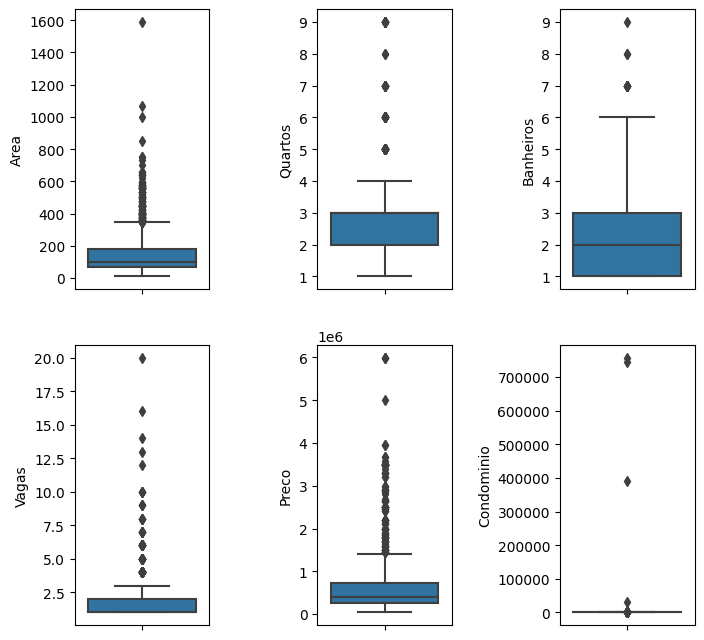

In [159]:
# Captura os nomes das colunas numéricas
num_vars = df.select_dtypes(include=['int', 'float']).columns
# Cria um grid com duas linhas e três colunas
fig, axes = plt.subplots(2, 3, figsize=(8,8))
plt.subplots_adjust(wspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(2):
  for col in range(3):
    ax = axes[row, col]
    sns.boxplot(y=num_vars[idx], data=df, ax=ax)
    idx += 1

Todos os atributos numéricos possuem valores consistentes com os tipos de dados estabelecidos. No entanto, alguns resultados chamam a atenção:

- O número máximo de vagas na garagem parece bastante extremo (20). Este valor pode estar relacionado a uma casa muito grande, porém deve ser investigado;

- Os valores mínimo (R\$ 1,00) e máximo (R\$ 757.210,00) para a contribuição mensal de condomínio parecem bastante extremos. É improvável que estes valores reflitam a realidade, e portanto devem ser analisados com mais detalhes.

Começaremos analisando o número de vagas de garagem.

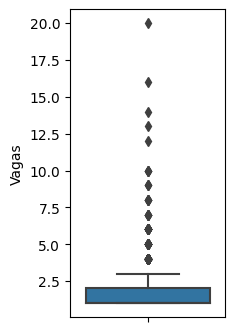

In [19]:
plt.figure(figsize=(2,4))
ax = sns.boxplot(y="Vagas", data=df)

In [24]:
df[df["Vagas"]>3]["Tipo_de_Moradia"].value_counts()

Casa           148
Apartamento      6
Name: Tipo_de_Moradia, dtype: int64

Pelo boxplot, valores de vaga de garagem superiores a três seriam considerados *outliers*. Desse conjunto (`Vagas` > 3), apenas 6 de 154 imóveis são apartamentos. Analisaremos esses 6 registros com maior profundidade.

In [26]:
df[(df["Vagas"]>3)&(df["Tipo_de_Moradia"]=="Apartamento")]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
132,Apartamento,Granbery,130.0,3.0,2.0,13.0,680000,1100.0,True,False,False,True,True,False,True,True,False,False
442,Apartamento,Bom Pastor,227.0,4.0,6.0,4.0,2000000,800.0,False,True,False,True,True,False,False,True,False,False
504,Apartamento,Santa Helena,10.0,5.0,3.0,4.0,2850000,1000.0,False,False,False,True,True,False,False,True,True,False
505,Apartamento,Santa Helena,180.0,4.0,4.0,4.0,1680000,NaN,True,False,False,True,True,False,False,True,True,False
690,Apartamento,São Mateus,250.0,4.0,4.0,5.0,460000,NaN,False,False,False,False,False,False,False,False,False,False
1173,Apartamento,Jardim Glória,98.0,2.0,2.0,9.0,369900,298.0,True,False,False,False,False,False,False,False,True,False


Desses 6 registros, 3 não possuem um número de vagas compatível com a área ou valor do imóvel:

- O registro 132, com 13 vagas de garagem para uma área de imóvel de 130 m$^2$;

- O registro 504, com 4 vagas de garagem para apenas 10 m$^2$ de imóvel;

- O registro 1173, com 9 vagas de garagem para apenas 98 m$^2$ de área total.

Embora esses valores chamem a atenção, não é possível afirmar com total certeza que se tratam de erros de preenchimento. Como os demais valores são referentes a casas, onde a percepção de uma vaga de garagem é mais subjetiva e as áreas totais em geral maiores, será considerado que esses valores também são válidos.

Agora serão analisados os valores extremos de `Condominio`.

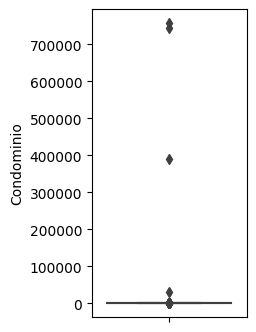

In [27]:
plt.figure(figsize=(2,4))
ax = sns.boxplot(y="Condominio", data=df)

In [29]:
df[df["Condominio"]>1500]

,Tipo_de_Moradia,Bairro,Area,Quartos,Banheiros,Vagas,Preco,Condominio,Aceita_Animais,Area_de_Servico,Churrasqueira,Elevador,Varanda,Piscina,Condominio_Fechado,Espaco_Gourmet,Portao_Eletronico,Quintal_ou_Jardim
187,Casa,São Mateus,174.0,4.0,3.0,NaN,745000,745000.0,False,True,False,False,False,False,False,False,False,False
304,Apartamento,Cascatinha,53.0,2.0,2.0,1.0,320000,30000.0,True,False,False,True,True,True,False,False,False,False
689,Apartamento,São Mateus,112.0,2.0,3.0,2.0,620000,757210.0,False,False,False,True,True,False,False,True,False,False
1336,Apartamento,Grama,133.0,2.0,2.0,NaN,390000,390000.0,False,False,False,False,False,False,False,False,False,True


Apenas quatro imóveis possuem valores de condomínio superiores a R\$ 1.500,00. É possível perceber que, para esses registros, o valor do condomínio é comparável ou por vezes superior ao próprio valor do imóvel, o que certamente indica um erro de preenchimento.

In [39]:
df[df["Condominio"]==1.0].shape[0]

39

Por outro lado, 39 imóveis possuem um valor simbólico de condomínio igual a R\$ 1,00. Isso pode indicar um preenchimento padrão para casos em que não existia cobrança de condomínio, de forma a não deixar esse campo em branco.

A seguir, temos um resumo estatístico dos atributos numéricos.

In [66]:
df[num_vars].mode()

,Area,Quartos,Banheiros,Vagas,Preco,Condominio
0,70.0,2.0,2.0,1.0,280000,250.0
1,NaN,NaN,NaN,NaN,350000,NaN


| Atributo       | Mínimo  | Máximo   | Mediana | Moda         | Média       | Desvio-Padrão | Valores Ausentes |
|----------------|---------|----------|---------|------------- |------------  |--------------  |------------------ |
| Area           | 10      | 1590     | 100     | 70          | 152.148692  | 133.380323    | 0                |
| Quartos        | 1       | 9        | 3       | 2           | 2.807029    | 1.129052      | 2                |
| Banheiros      | 1       | 9        | 2       | 2           | 2.292278    | 1.314556      | 0                |
| Vagas          | 1       | 20       | 1       | 1           | 1.951435    | 1.564705      | 208              |
| Preco          | 40000   | 5990000  | 389000  | 280000 e 350000 | 621353.1  | 667445.0      | 0                |
| Condominio     | 1       | 757210   | 250     | 250         | 2881.862348 | 41514.020787  | 826              |

A partir da tabela, é possível realizar as seguintes observações:

- A distribuição da `Area` possui alta variablidade, devido ao seu valor de desvio-padrão elevado, próximo à média. A distribuição também é dita assimétrica positiva ou assimétrica à direita, com Moda < Mediana < Média;

- A distribuição do `Preco` também possui alta variabilidade, com desvio-padrão superior ao valor da média. Essa distribuição é bimodal (nos valores de R\$ 280.000,00 e R\$ 350.000,00) e assimetrica positiva;

- O desvio-padrão de `Condominio` é demasiadamente elevado, o que pode ser explicado pela presença de valores discrepantes advindos de erros de preenchimento, como detalhado anteriormente. Esses valores serão corrigidos na etapa de pré-processamento.

### Visualizações

Como uma primeira análise visual, serão verificadas as distribuições de cada atributo numérico.

In [160]:
# Define uma cor padrão
cor_padrao = "#6688AA"

# Carrega uma folha de estilos
plt.style.use("ggplot")

# Modifica alguns parâmetros gráficos
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="f0f0f0")

# plt.rcdefaults() # Restaura a configuração padrão

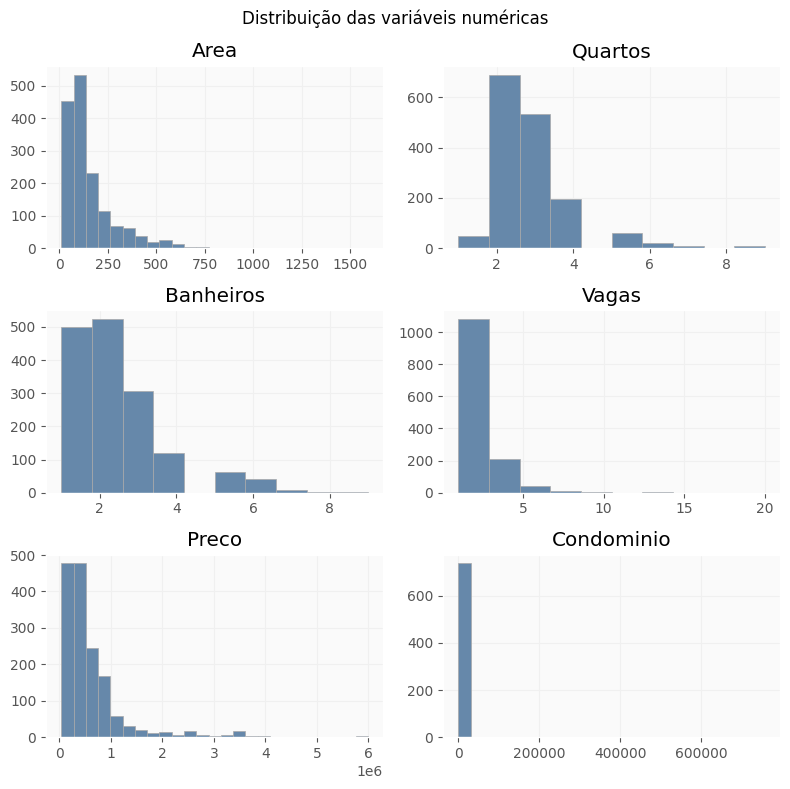

In [156]:
# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(3, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(3):
  for col in range(2):
    ax = axes[row, col]
    # Diferenciando variáveis numéricas com poucos valores distintos
    if len(df[num_vars[idx]].unique())<20: bins = 10
    else: bins = 25
    ax.hist(df[num_vars[idx]], bins=bins, color=cor_padrao, edgecolor='darkgray')
    ax.set_title(num_vars[idx])
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Distribuição das variáveis numéricas")
# Elimina margens desnecessárias
plt.tight_layout()

Em seguida, serão criadas visualizações para a contagem de categorias para cada atributo categórico/booleano. Nesse contexto, atributos booleanos podem ser considerados atributos categóricos com duas categorias: Verdadeiro ou Falso.

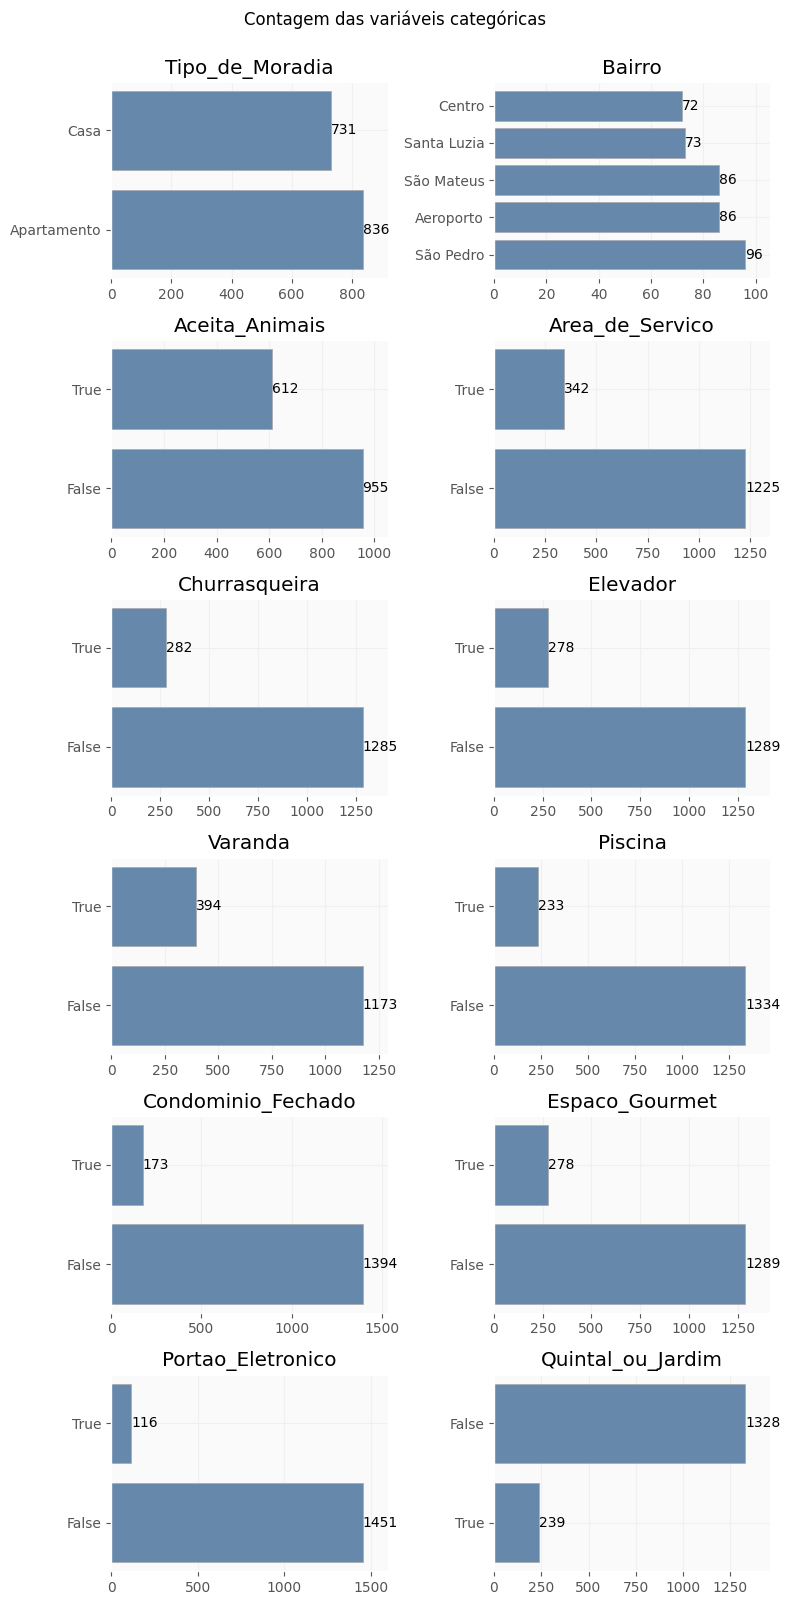

In [177]:
# Captura os nomes das colunas categóricas
cat_vars = df.select_dtypes(include=['object', 'bool']).columns

# Cria um grid com três linhas e duas colunas
fig, axes = plt.subplots(6, 2, figsize=(8,16))
plt.subplots_adjust(hspace=0.2)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(6):
  for col in range(2):
    ax = axes[row, col]
    cats = df[cat_vars[idx]].value_counts().index[:5]
    cats = [str(cat) for cat in cats]
    values = df[cat_vars[idx]].value_counts().values[:5]
    ax.barh(y=cats, width=values, color=cor_padrao, edgecolor='darkgray')
    ax.set_xlim(0, values.max()*1.1)
    ax.bar_label(ax.containers[0])
    ax.set_title(cat_vars[idx])
    idx += 1

# Adiciona um título ao gráfico
plt.suptitle("Contagem das variáveis categóricas", y=1.00)
# Elimina margens desnecessárias
plt.tight_layout()

## Pré-processamento de dados

## Conclusões